# **Machine Learning Implementation**
Latar Belakang Tugas

Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses. Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan. Sebagai catatan, anda perlu menggunakan setidaknya 2 model Machine Learning dimana salah satunya adalah Logistic Regression. Setelah itu, buatlah slide presentasi yang mengandung analisa hasil pemodelan secara end-to-end beserta rekomendasi bisnisnya (maksimal 10 halaman)

Tahapan Pengerjaan
1. Download Dataset yang dibutuhkan.
2. Pelajari konteks masalah dari sumber eksternal untuk meningkatkan Subject Matter Knowledge.
3. Pahami deskripsi kolom yang tersedia.
4. Tentukan goal, objective, dan metrics dari masalah yang ada.
5. Lakukan penggalian informasi terkait kondisi data awal.
6. Lakukan proses Data Cleaning dan Data Processing.
7. Lakukan proses penggalian insight mengacu kepada objective yang sudah ditetapkan.
8. Lakukan pemodelan dengan berbagai macam metode (termasuk Logistic Regression) dan hyperparameternya.
9. Evaluasi hasil pemodelan.
10. Ukur seberapa besar dampak pemodelan dan rekomendasi bisnis terhadap metrics yang telah ditetapkan sebelumnya.
11. Push file .ipynb mu ke dalam github.
12. Buat file presentasi untuk menjelaskan pekerjaan yang telah dilakukan dan cantumkan link repo github di dalam ppt nya


In [ ]:
#memanggil data training dan testing
import pandas as pd

data_train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Home Credit Indonesia/application_train.csv")
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Home Credit Indonesia/application_test.csv")
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# **1. Data Preprocessing**

Berikut adalah tahapan data preprocessing yang dilakukan:
1. Cek data duplikat
2. Pemilihan variabel pemodelan
3. Cek dan penanganan missing value
4. Cek word spelling
4. Penambahan variabel untuk pemodelan

Pada tahap ini tidak dilakukan identifying outlier karena dirasa kurang penting terhadap pemodelan yang akan dilakukan. Identifikasi outlier begitu penting ketika diimplementasikan untuk analisis model parametrik atau uji parametrik yang membutuhkan asumsi data tanpa outlier ataupun normalitas data. Namun, pada classification (klasifikasi) tidak terdapat asumsi tersebut sehingga identifying outlier bisa diabaikan.

In [ ]:
#data duplikat
data_train.duplicated().sum()

0

In [ ]:
data_test.duplicated().sum()

0

Sebelum checking missing value, terlebih dahulu akan dipilih beberapa variabel yang akan digunakan untuk pemodelan. 

In [ ]:
#nama variabel
data_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [ ]:
train_pakai=data_train[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH']]

test_pakai=data_test[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH']]

Berikut ini adalah deskripsi dari variabel yang digunakan untuk pemodelan:
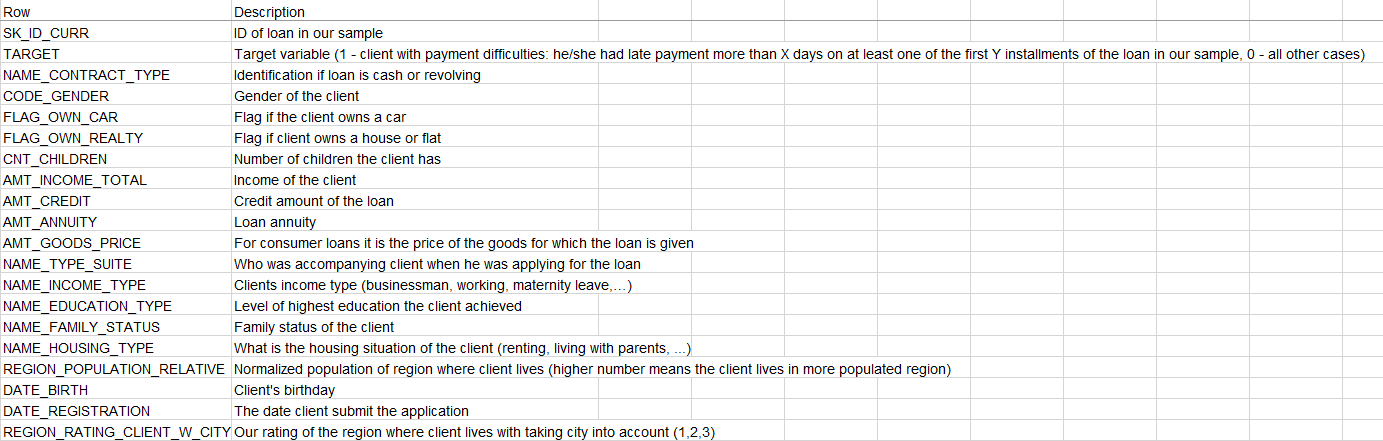

In [ ]:
#checking missing value data train dan test
print('Cek Missing Value Data Training:\n',train_pakai.isna().sum(),"\n\n","Cek Missing Value Data Testing:\n",test_pakai.isna().sum())

Cek Missing Value Data Training:
 TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
dtype: int64 

 Cek Missing Value Data Testing:
 NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    24
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE 

Berdasarkan output di atas dapat dilihat bahwa terdapat missing value pada data training dan testing. Penanganan missing value pada kali ini akan dilakukan dengan cara remove missing values.

In [ ]:
train_pakai=train_pakai.dropna()
test_pakai=test_pakai.dropna()

In [ ]:
#rechecking missing value data train dan test
print('Cek Missing Value Data Training:\n',train_pakai.isna().sum(),"\n\n","Cek Missing Value Data Testing:\n",test_pakai.isna().sum())

Cek Missing Value Data Training:
 TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
dtype: int64 

 Cek Missing Value Data Testing:
 NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE  

In [ ]:
#melihat jumlah rows data yang telah bersih
print(len(train_pakai),len(test_pakai))

306207 47809


Langkah selanjutnya adalah melakukan pengecekkan terhadap word spelling.

In [ ]:
train_pakai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306207 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      306207 non-null  int64  
 1   NAME_CONTRACT_TYPE          306207 non-null  object 
 2   CODE_GENDER                 306207 non-null  object 
 3   FLAG_OWN_CAR                306207 non-null  object 
 4   FLAG_OWN_REALTY             306207 non-null  object 
 5   CNT_CHILDREN                306207 non-null  int64  
 6   AMT_INCOME_TOTAL            306207 non-null  float64
 7   AMT_CREDIT                  306207 non-null  float64
 8   AMT_ANNUITY                 306207 non-null  float64
 9   AMT_GOODS_PRICE             306207 non-null  float64
 10  NAME_TYPE_SUITE             306207 non-null  object 
 11  NAME_INCOME_TYPE            306207 non-null  object 
 12  NAME_EDUCATION_TYPE         306207 non-null  object 
 13  NAME_FAMILY_ST

In [ ]:
print(train_pakai['TARGET'].unique(),'\n',
    train_pakai['NAME_CONTRACT_TYPE'].unique(),'\n',
      train_pakai['CODE_GENDER'].unique(),'\n',
      train_pakai['FLAG_OWN_CAR'].unique(),'\n',
      train_pakai['FLAG_OWN_REALTY'].unique(),'\n',
      train_pakai['NAME_TYPE_SUITE'].unique(),'\n',
      train_pakai['NAME_INCOME_TYPE'].unique(),'\n',
      train_pakai['NAME_EDUCATION_TYPE'].unique(),'\n',
      train_pakai['NAME_FAMILY_STATUS'].unique(),'\n',
      train_pakai['NAME_HOUSING_TYPE'].unique())
      

[1 0] 
 ['Cash loans' 'Revolving loans'] 
 ['M' 'F' 'XNA'] 
 ['N' 'Y'] 
 ['Y' 'N'] 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people'] 
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 
 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'] 
 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [ ]:
print(test_pakai['NAME_CONTRACT_TYPE'].unique(),'\n',
      test_pakai['CODE_GENDER'].unique(),'\n',
      test_pakai['FLAG_OWN_CAR'].unique(),'\n',
      test_pakai['FLAG_OWN_REALTY'].unique(),'\n',
      test_pakai['NAME_TYPE_SUITE'].unique(),'\n',
      test_pakai['NAME_INCOME_TYPE'].unique(),'\n',
      test_pakai['NAME_EDUCATION_TYPE'].unique(),'\n',
      test_pakai['NAME_FAMILY_STATUS'].unique(),'\n',
      test_pakai['NAME_HOUSING_TYPE'].unique())

['Cash loans' 'Revolving loans'] 
 ['F' 'M'] 
 ['N' 'Y'] 
 ['Y' 'N'] 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Group of people' 'Other_B'
 'Children' 'Other_A'] 
 ['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed'] 
 ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 
 ['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated'] 
 ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


Dapat dilihat pada output di atas bahwa tidak terdapat kesalahan tulis (typo) pada kategori-kategori di tiap variabel kategorik. Namun, pada variabel CODE_GENDER terdapat kategori XNA pada data training sehingga harus ditangani dengan cari dibuang dari dataset. Selain itu, pada NAME_INCOME_TYPE juga terdapat kategori Maternity leave pada data training namun pada data testing tidak sehingga akan dihapus juga.

In [ ]:
train_pakai.drop(train_pakai.index[train_pakai['CODE_GENDER']=='XNA'],inplace=True)
train_pakai.drop(train_pakai.index[train_pakai['NAME_INCOME_TYPE']=='Maternity leave'],inplace=True)

In [ ]:
#rechecking kategori CODE_GENDER
train_pakai.CODE_GENDER.unique()

array(['M', 'F'], dtype=object)

In [ ]:
#rechecking kategori NAME_INCOME_TYPE
train_pakai.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman'], dtype=object)

In [ ]:
print(len(train_pakai))
print(len(test_pakai))

306198
47809


Variabel DAYS_BIRTH kurang bisa memberikan makna untuk pemodelan sehingga akan diganti dengan variabel AGE yang berisi umur pelanggan (tahun dalam integer). 

In [ ]:
AGE_TR=(train_pakai['DAYS_BIRTH']/-365).astype(int)
AGE_TS=(test_pakai['DAYS_BIRTH']/-365).astype(int)

In [ ]:
train_pakai=train_pakai.assign(AGE=AGE_TR).drop('DAYS_BIRTH',axis=1)
train_pakai.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54


In [ ]:
test_pakai=test_pakai.assign(AGE=AGE_TS).drop('DAYS_BIRTH',axis=1)
test_pakai.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,52
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,49
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,38
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,35
5,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.025164,50


# **2. EDA**

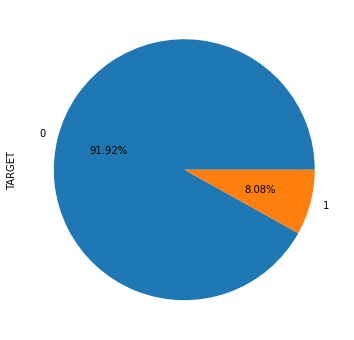

In [ ]:
#pie chart TARGET (train_pakai)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
train_pakai.TARGET.value_counts().plot(kind='pie',autopct='%.2f%%')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


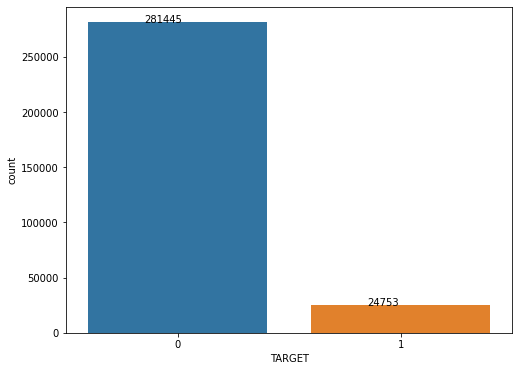

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.countplot(train_pakai['TARGET'],order=train_pakai['TARGET'].value_counts(ascending=False).index)
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

Berdasarkan visualisasi di atas, dapat dilihat bahwa jumlah TARGET dengan kategori 0 lebih banyak (281445) dibanding kategori 0 (24753) dengan persentase masing-masing adalah 91.92% dan 8.08%. Hal tersebut mengartikan bahwa pelanggan yang tidak memiliki kesulitan pembayaran jumlahnya lebih banyak (TARGET == 0).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

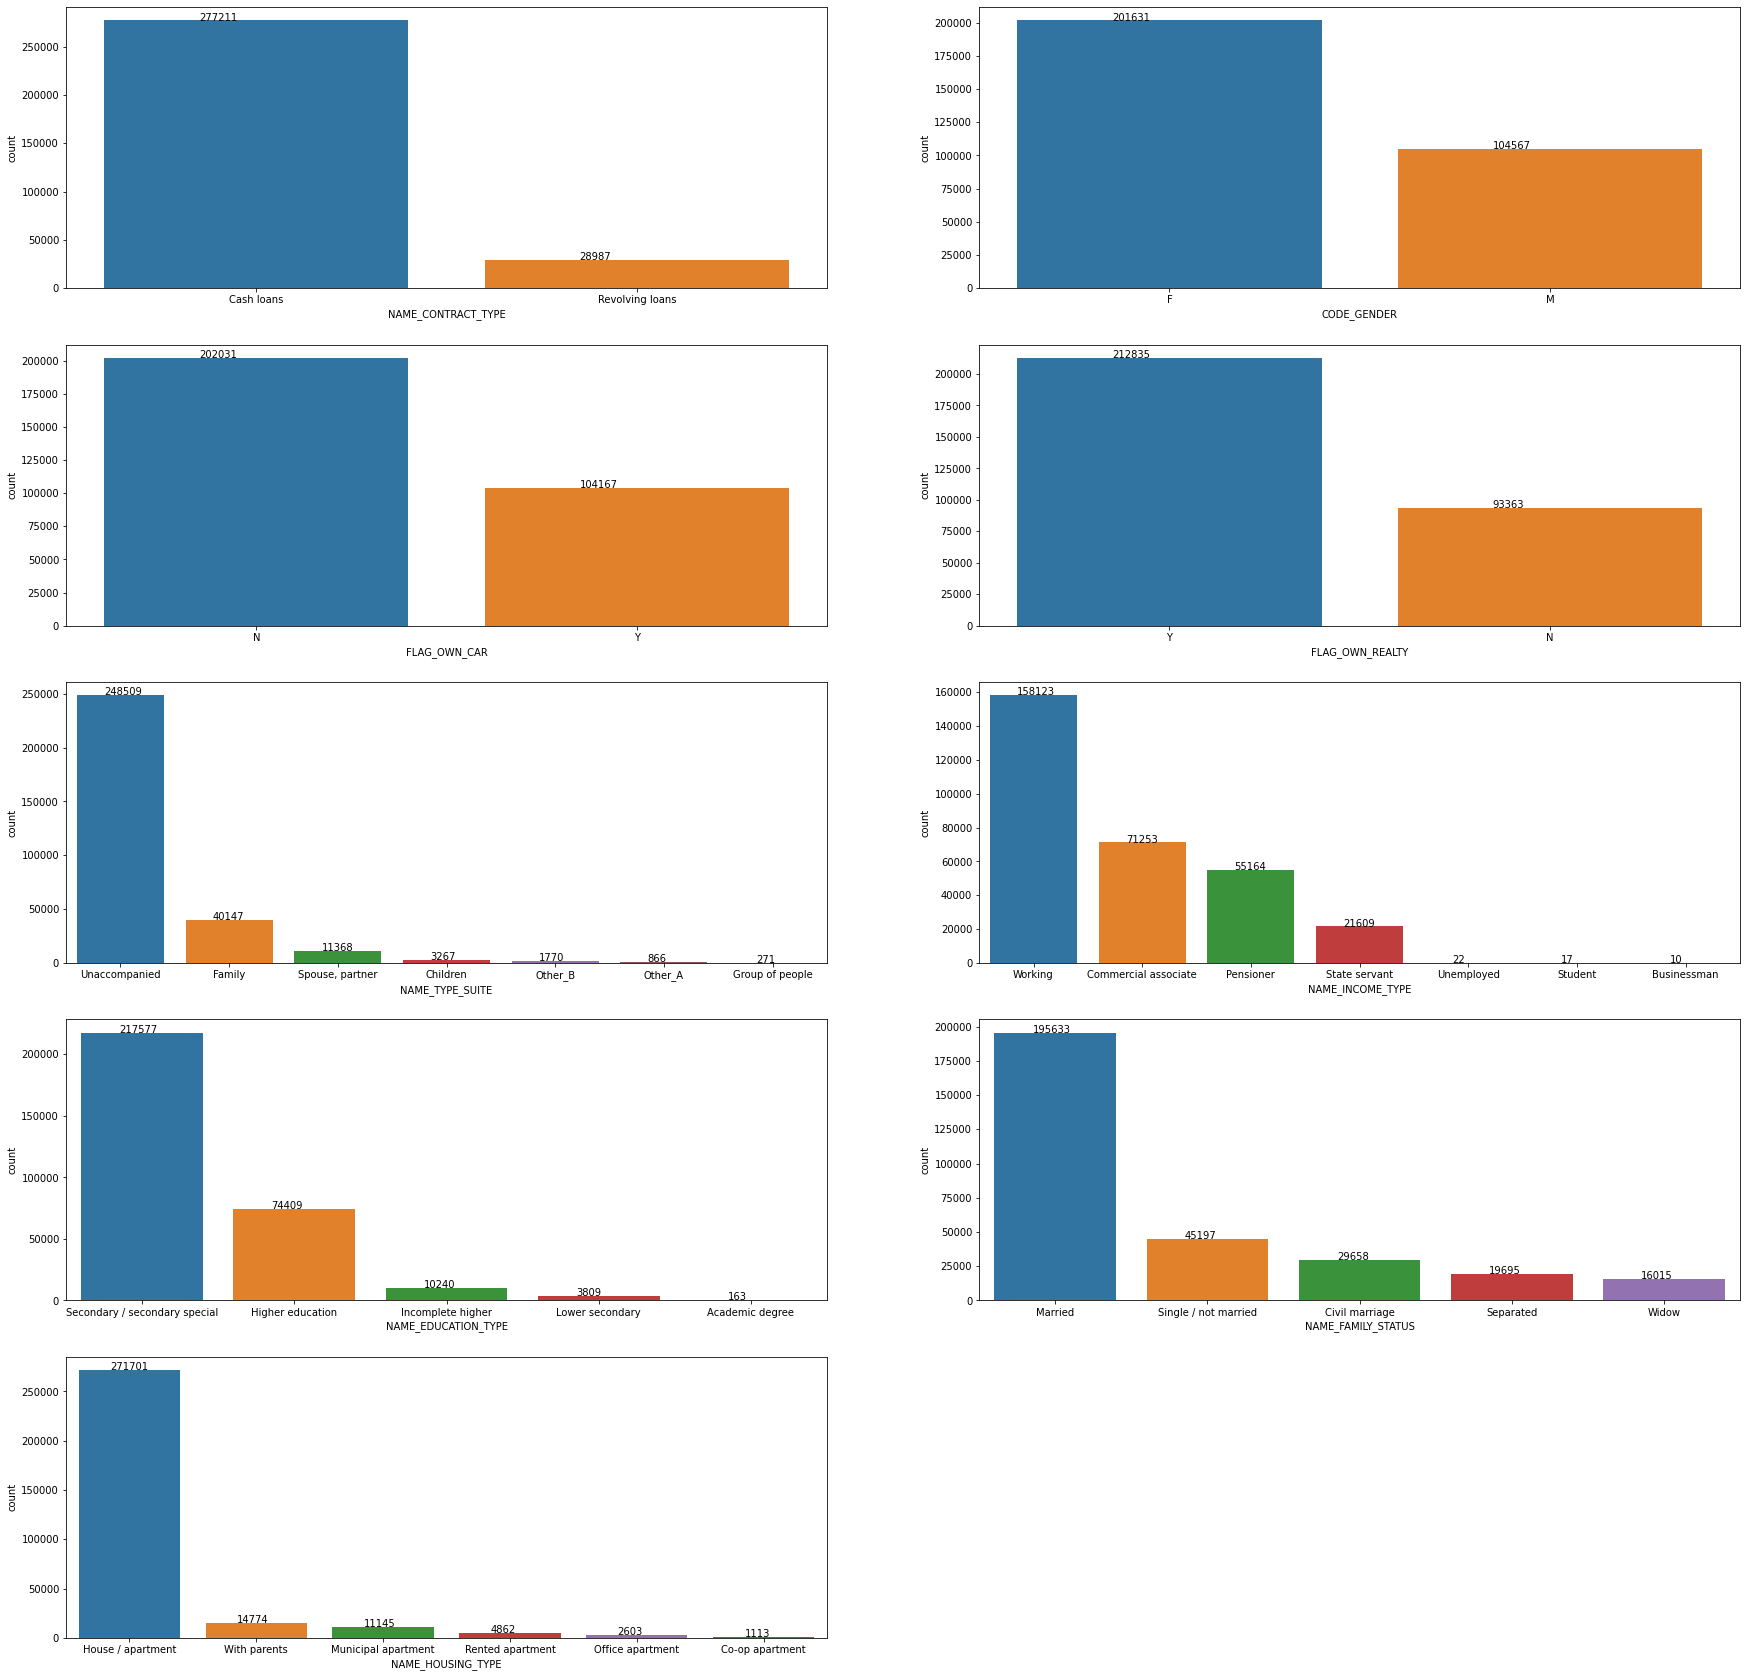

In [ ]:
#barchart variabel dengan tipe data category

categ_features=[feature for feature in train_pakai.columns if train_pakai[feature].dtypes=='object']
categ=train_pakai[categ_features]
plt.figure(figsize=(30,30))
for n in range(1,10):
  plt.subplot(5,2,n)
  ax=sns.countplot(categ.iloc[:,n-1],order=categ.iloc[:,n-1].value_counts(ascending=False).index)
  for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

Visualisasi di atas memberikan informasi bahwa jumlah pelanggan dengan NAME_CONTRACT_TYPE kategori cash loan lebih banyak dibandingkan revolving loan. Kemudian, pelanggan juga didominasi oleh para pelanggan yang berjenis kelaim perempuan (CODE_GENDER).

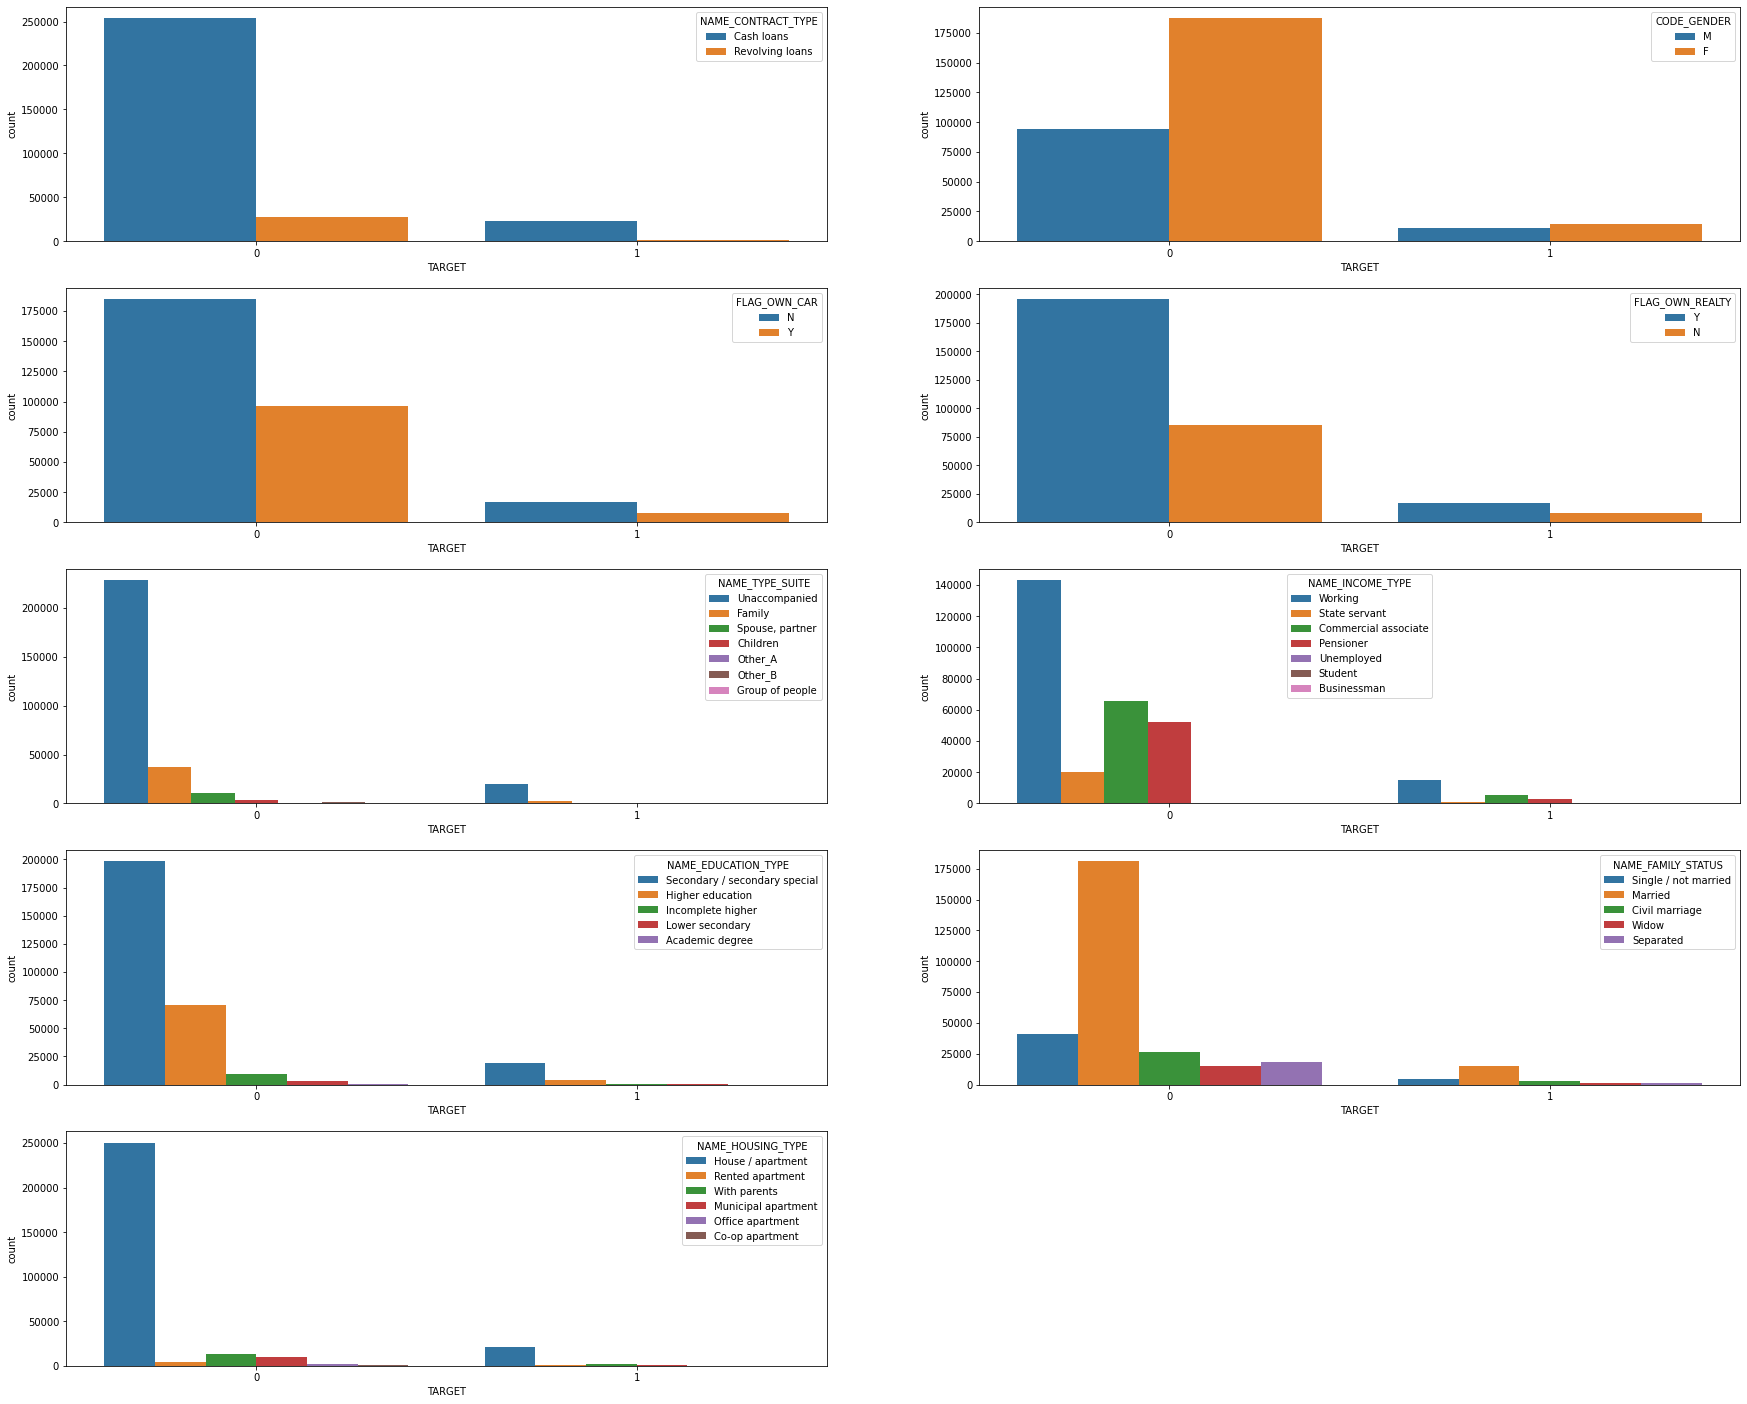

In [ ]:
#Countplot TARGET Berdasarkan beberapa kategori
plt.figure(figsize=(30,25))

plt.subplot(5,2,1)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.NAME_CONTRACT_TYPE)

plt.subplot(5,2,2)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.CODE_GENDER)

plt.subplot(5,2,3)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.FLAG_OWN_CAR)

plt.subplot(5,2,4)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.FLAG_OWN_REALTY)

plt.subplot(5,2,5)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.NAME_TYPE_SUITE)

plt.subplot(5,2,6)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.NAME_INCOME_TYPE)

plt.subplot(5,2,7)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.NAME_EDUCATION_TYPE)

plt.subplot(5,2,8)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.NAME_FAMILY_STATUS)

plt.subplot(5,2,9)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.NAME_HOUSING_TYPE)

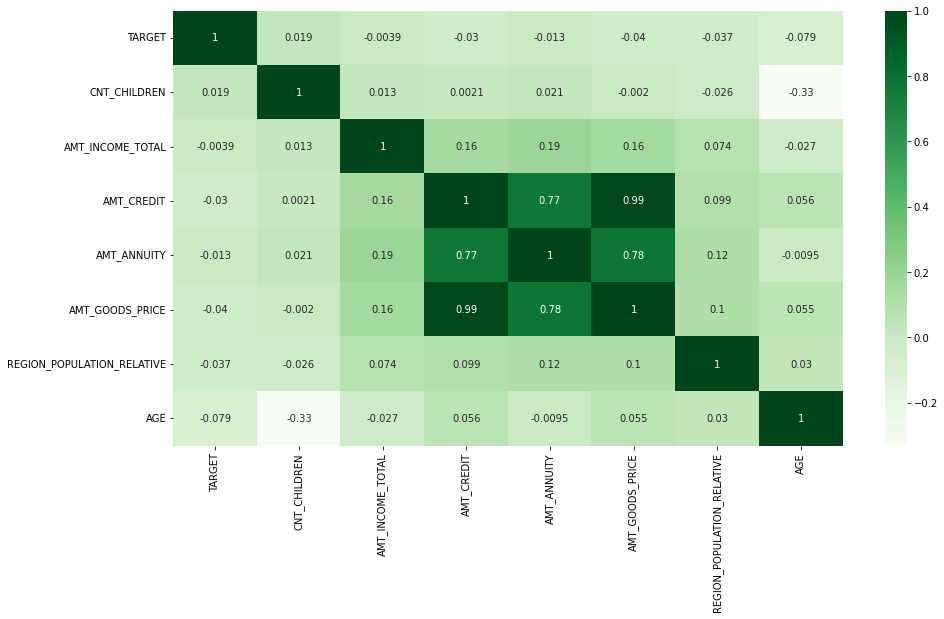

In [ ]:
#membentuk heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(train_pakai.corr(),cmap='Greens',annot=True)

Matrix korelasi di atas menunjukkan bahwa variabel CNT_CHILDREN, ANT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, dan AGE memiliki nilai korelasi yang rendah terhadap variabel TARGET. Hal ini bisa dilihat pada nilai absolute koefisien korelasi < 0.8.

# **3. Classification**

In [ ]:
X=train_pakai.drop('TARGET',axis=1)
y=train_pakai['TARGET']

In [ ]:
X=pd.get_dummies(X)
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,25,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,45,1,0,1,...,1,0,0,0,0,1,0,0,0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,52,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,52,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,54,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
X_test_cek=pd.get_dummies(test_pakai)
X_test_cek.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,135000.0,568800.0,20560.5,450000.0,0.018850,52,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,99000.0,222768.0,17370.0,180000.0,0.035792,49,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,38,1,0,1,...,1,0,0,0,0,1,0,0,0,0
4,1,180000.0,625500.0,32067.0,625500.0,0.010032,35,1,0,0,...,1,0,0,0,0,1,0,0,0,0
5,0,270000.0,959688.0,34600.5,810000.0,0.025164,50,1,0,1,...,1,0,0,0,0,1,0,0,0,0


Pada kali ini, akan dilakukan pembagian data 75% untuk training dan 25% untuk testing.

In [ ]:
#split data train menjadi training dan testing (untuk melihat overfitting model klasifikasi)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=60)

Pada tahap classifiction ini, digunakan dua macam metode yaitu:
1. Regresi logistik
2. K-Nearest Neighbor

Untuk hyperparameter tuning yang akan digunakan adalah Random Search CV.

**Random Search**

Random search mirip dengan grid search, tetapi alih-alih menggunakan semua titik di kisi, ini hanya menguji subset yang dipilih secara acak dari titik-titik ini. Semakin kecil subset ini, semakin cepat tetapi kurang akurat pengoptimalan. Semakin besar kumpulan data ini, semakin akurat pengoptimalan tetapi semakin mendekati grid seaarch.

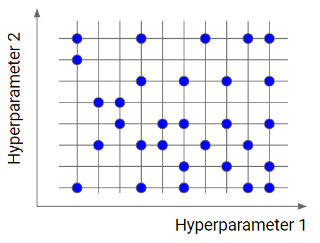

Random serach adalah pilihan yang sangat berguna ketika memiliki beberapa hyperparameters dengan grid nilai yang halus. Menggunakan subset yang dibuat oleh 5-100 titik yang dipilih secara acak, kita bisa mendapatkan set nilai hyperparameter yang cukup baik. Ini mungkin tidak akan menjadi poin terbaik, tetapi masih bisa menjadi kumpulan nilai yang baik yang memberi kita model yang baik.

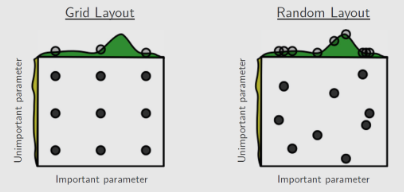

Strategi Grid search secara terang-terangan melewatkan model yang optimal dan menghabiskan waktu yang berlebihan untuk menjelajahi parameter yang tidak penting. Grid serach mengisolasi setiap hyperparameter dan mencari nilai terbaik yang mungkin sambil mempertahankan semua hyperparameter lainnya konstan. Untuk kasus di mana hyperparameter yang sedang dipelajari memiliki pengaruh yang kecil pada skor model yang dihasilkan, hal ini menghasilkan usaha yang sia-sia. Sebaliknya, Random serach memiliki kekuatan eksplorasi yang jauh lebih baik dan dapat berfokus pada menemukan nilai optimal untuk hyperparameter penting.

**K-Fold Cross-Validation**

Cross-validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi / evaluasi. Model atau algoritma dilatih oleh subset pembelajaran dan divalidasi oleh subset validasi. Selanjutnya pemilihan jenis CV dapat didasarkan pada ukuran dataset. Biasanya CV K-Fold digunakan karena dapat mengurangi waktu komputasi dengan tetap menjaga keakuratan estimasi.

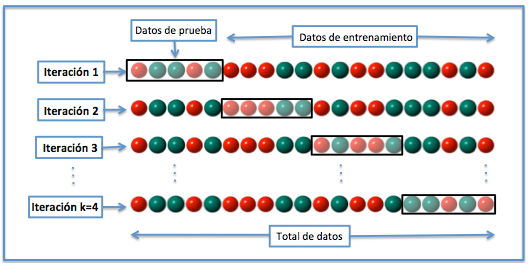

Metode ini sering juga disebut dengan k-fold cross validation dimana percobaan sebanyak k kali untuk satu model dengan parameter yang sama (Santosa dan Umam 2018) Dalam bukunya yang berjudul "Data Mining dan Big Data Analytics" Secara umum, kita akan membandingkan n model dalam cross validation ini, dalam arti lain fungsi dari penggunaan metode cross validation adalah:
1. Untuk mengetahui performa dari suatu model algoritma dengan melakukan percobaan sebanyak k kali
2. Untuk menningkatkan tingkat performansi dari model tersebut
3. Untuk mengolah data set dengan kelas yang seimbang

Dalam kasus klasifikasi, ada yang perlu diperhatikan dalam pembagian set data ke sejumlah k partisi, yaitu harus melakukan stratification  yang artinya kita akan mempartisi atau membagi set data tersebut ke k partisi denga komposisi kelas yang seimbang disetiap partisinya. Dengan kata lain, distribusi kelas setiap partisi harus sama antar kelas, yang berarti juga sama dengan distribusi kelas di set data originalnya.


In [ ]:
#classification
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix

In [ ]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [ ]:
#logistic regression 
logModel = LogisticRegression()
parameter = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = RandomizedSearchCV(logModel, param_distributions = parameter, n_iter=100, cv = 5, verbose = 2, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Logistic Regression
Best Score: 0.9188845538563705
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 2000, 'C': 0.0001}


Output Random Search dengan 5-fold Cross-Validation di atas menunjukkan bahwa parameter terbaik dalam pemodelan regresi logistik adalah:

- solver = 'liblinear' 

- penalty = 'l1'

- max_iter = 2000 

- C = 0.0001

Sehingga akan dilakukan pemodelan menggunakan parameter di atas (best parameters).

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70425
           1       0.00      0.00      0.00      6125

    accuracy                           0.92     76550
   macro avg       0.46      0.50      0.48     76550
weighted avg       0.85      0.92      0.88     76550



<Figure size 720x720 with 0 Axes>

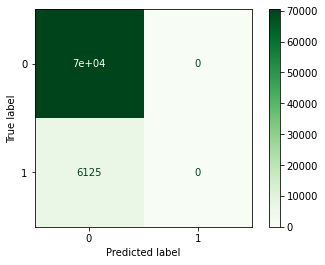

In [ ]:
#Evaluasi model regresi logistik 

logModel=LogisticRegression(solver= 'liblinear', penalty= 'l1', max_iter= 2000, C= 0.0001).fit(X_train,y_train)
y_prediksi_log=logModel.predict(X_test)

print(classification_report(y_test,y_prediksi_log))
plt.figure(figsize=(10,10))
plot_confusion_matrix(logModel,X_test,y_test,cmap=plt.cm.Greens)

In [ ]:
print('Accuracy:',accuracy_score(y_test,y_prediksi_log))
print('Precision:',precision_score(y_test,y_prediksi_log,average='macro'))
print('Recall:',recall_score(y_test,y_prediksi_log,average='macro'))
print('f1-score:',f1_score(y_test,y_prediksi_log,average='macro'))

Accuracy: 0.9199869366427171
Precision: 0.45999346832135857
Recall: 0.5
f1-score: 0.47916312298009867


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Berdasarkan hasil klasifikasi regresi logistik di atas, dapat dilihat bahwa nilai akurasi data testing 0.9199869366427171 atau 92% sangat tinggi. Nilai tersebut hampir sama dengan best score data training yang sebesar 0.9188845538563705 atau 91.89%. Namun, hasil prediksi menunjukkan bahwa tidak ada yang diklasifikasikan ke dalam kategori TARGET==1 sehingga model regresi logistik kurang tepat jika digunakan untuk prediksi.

In [ ]:
#KNN
knn = KNeighborsClassifier()
parameter = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance']}
clf_knn = RandomizedSearchCV(knn, param_distributions = parameter, n_iter=100, cv = 5, verbose = 2,  n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


KNN
Best Score: 0.9174824104094215
Best Parameters: {'weights': 'uniform', 'n_neighbors': 9}


Output Random Search dengan 5-fold Cross-Validation di atas menunjukkan bahwa parameter terbaik dengan metode KNN adalah:

- weights = 'uniform' 

- n_neighbors = 9

Sehingga akan dilakukan pemodelan menggunakan parameter di atas (best parameters).

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70425
           1       0.23      0.01      0.01      6125

    accuracy                           0.92     76550
   macro avg       0.57      0.50      0.49     76550
weighted avg       0.86      0.92      0.88     76550



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x576 with 0 Axes>

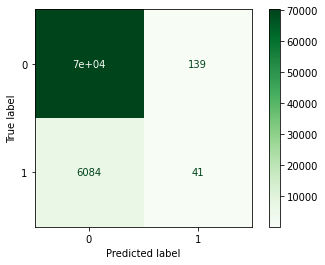

In [ ]:
#Evaluasi model KNN 

knn=KNeighborsClassifier(weights='uniform',n_neighbors=9).fit(X_train,y_train)
y_prediksi=knn.predict(X_test)

print(classification_report(y_test,y_prediksi))
plt.figure(figsize=(8,8))
plot_confusion_matrix(knn,X_test,y_test,cmap=plt.cm.Greens)
plt.show()

In [ ]:
print('Accuracy:',accuracy_score(y_test,y_prediksi))
print('Precision:',precision_score(y_test,y_prediksi,average='macro'))
print('Recall:',recall_score(y_test,y_prediksi,average='macro'))
print('f1-score:',f1_score(y_test,y_prediksi,average='macro'))

Accuracy: 0.9187067276290006
Precision: 0.5740564939694179
Recall: 0.5023600733158013
f1-score: 0.4853065495454436


Berdasarkan hasil klasifikasi dengan metode KNN di atas, dapat dilihat bahwa nilai akurasi data testing 0.9187067276290006 atau 91.87% sangat tinggi. Nilai tersebut hampir sama dengan best score data training yang sebesar 0.9174824104094215 atau 91.75% sehingga metode KNN tersebut layak digunakan.

# **4. Prediksi Data Testing**

Metode yang akan dipilih untuk prediksi adalah metode KNN dengan weights = 'uniform' dan n_neighbors = 9. Langkah selanjutnya yaitu melakukan prediksi terhadap data testing yang telah disediakan.

In [ ]:
knn_test=KNeighborsClassifier(weights='uniform',n_neighbors=9).fit(X,y)
y_prediksi_test=knn_test.predict(X_test_cek)

In [ ]:
y_prediksi_test=pd.DataFrame(y_prediksi_test)
y_prediksi_test

,0
0,0
1,0
2,0
3,0
4,0
...,...
47804,0
47805,0
47806,0
47807,0


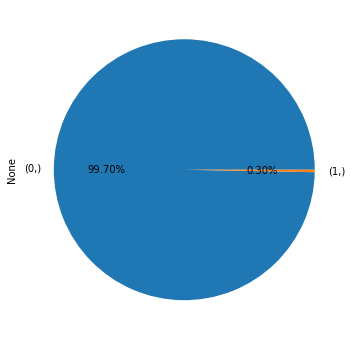

In [ ]:
#persentase prediksi variabel TARGET
plt.figure(figsize=(6,6))
y_prediksi_test.value_counts().plot(kind='pie',autopct='%.2f%%')

In [ ]:
y_prediksi_test.value_counts()


0    47665
1      144
dtype: int64

# **5. Rekomendasi**


- Home Credit Indonesia harus memberikan perhatian khusus kepada pelanggan yang memilih pinjaman cash loans, sedang bekerja, sudah manikah, dan memiliki rumah atau apartment karena mereka adalah pelanggan dengan proporsi tertinggi yang tidak mengalami kesulitan pembayaran. Perhatian khusus bisa berupa keringanan batas waktu pembayaran, anuitas yang lebih kecil, atau peningkatan batas pinjaman.

- Disarankan untuk membentuk model klasifikasi dengan metode balancing dataset seperti SMOTE agar hasil prediksi semakin akurat. Hal tersebut dikarenakan jumlah pelanggan yang tidak mengalami kesulitan pembayaran lebih banyak dibandingkn yang mengalami kesulitan pembayaran sehingga dataset menjadi imbalance.


# **6. Referensi**

https://www.kaggle.com/code/kenjee/titanic-project-example

https://www.yourdatateacher.com/2021/05/19/hyperparameter-tuning-grid-search-and-random-search/

https://www.jeremyjordan.me/hyperparameter-tuning/

https://commons.wikimedia.org/wiki/File:K-fold_cross_validation.jpg

https://mti.binus.ac.id/2017/11/24/10-fold-cross-validation/

https://www.pengalaman-edukasi.com/2020/04/apa-itu-k-fold-cross-validation.html

